<h1>Forecasting number of Air Passengers for next 10 years</h1>

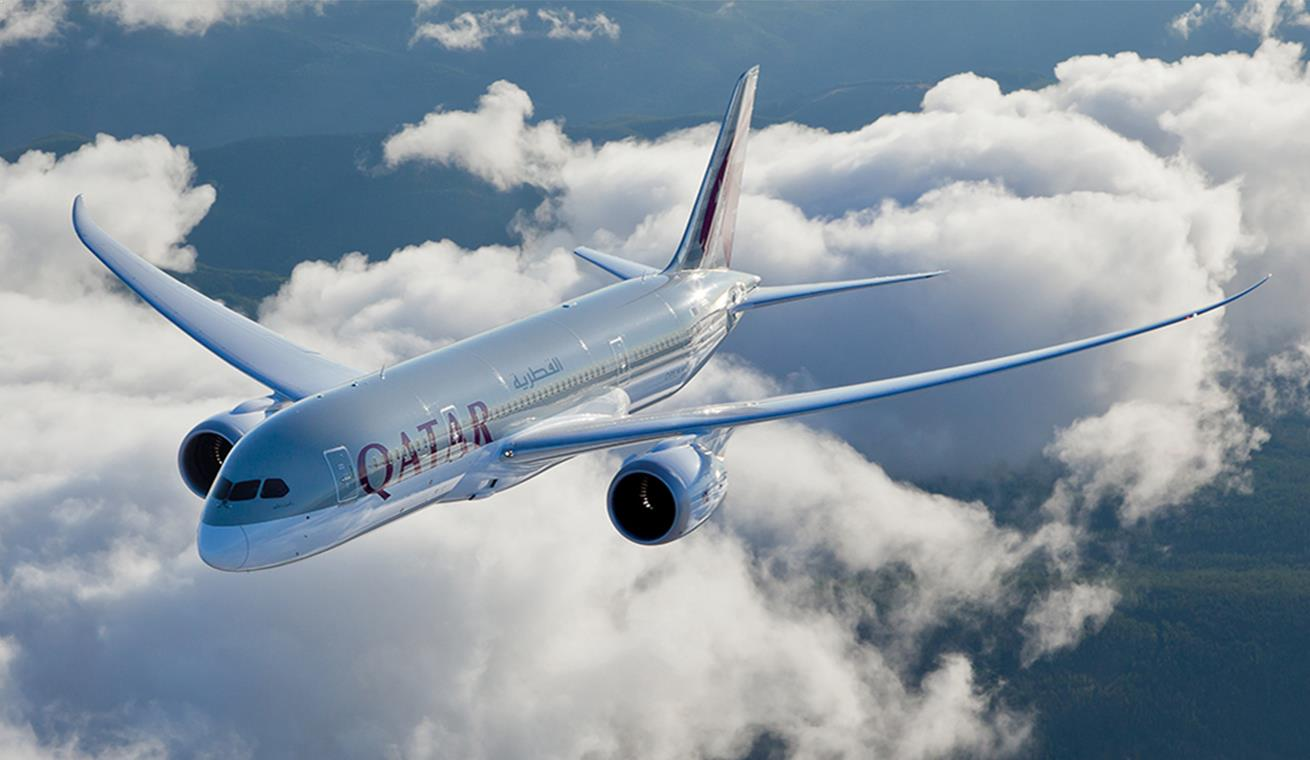

- Importing all the required libraries for analysis

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

- Reading the dataset file and checking the size of file

In [44]:
data=pd.read_csv(r'Data\AirPassengers.csv')
data.shape

(144, 2)

In [45]:
data.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [46]:
data['Month']

0      1949-01
1      1949-02
2      1949-03
3      1949-04
4      1949-05
        ...   
139    1960-08
140    1960-09
141    1960-10
142    1960-11
143    1960-12
Name: Month, Length: 144, dtype: object

- Creating the 'Date' as Index for data and viewing the dataset

In [47]:
data['Month']=pd.to_datetime(data['Month'], infer_datetime_format=True)
data=data.set_index(['Month'])
print(data.head())
print(data.tail())

            Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121
            Passengers
Month                 
1960-08-01         606
1960-09-01         508
1960-10-01         461
1960-11-01         390
1960-12-01         432


- Visualizing the Time Series plot for the number of Air Passengers 

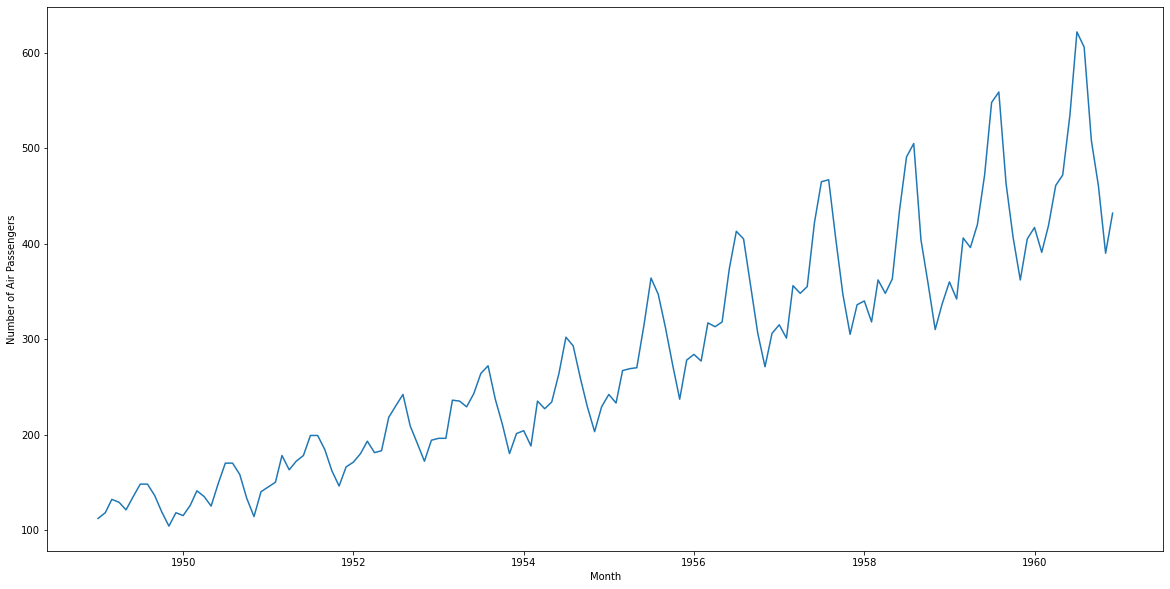

In [48]:
plt.figure(figsize=(20,10))
plt.xlabel("Month")
plt.ylabel("Number of Air Passengers")
plt.plot(data)

- As we know that, A stationary Time Series is one which characteristics like mean and variance does not change over time
- Preparing the data for analyzing the Rolling Mean and Standard Deviation to check stationarity for given Time Series

In [49]:
rolmean=data.rolling(window=12).mean()
rolstd=data.rolling(window=12).std()
print(rolmean.head(15))
print(rolstd.head(15))

            Passengers
Month                 
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01  126.666667
1950-01-01  126.916667
1950-02-01  127.583333
1950-03-01  128.333333
            Passengers
Month                 
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01   13.720147
1950-01-01   13.453342
1950-02-01   13.166475
1950-03-01   13.686977


- Plotting the Rolling Mean and Standard Deviation, which has window of 12
- By looking below plot, we conclude that, it is non-stationary bcoz mean and variance is not constant

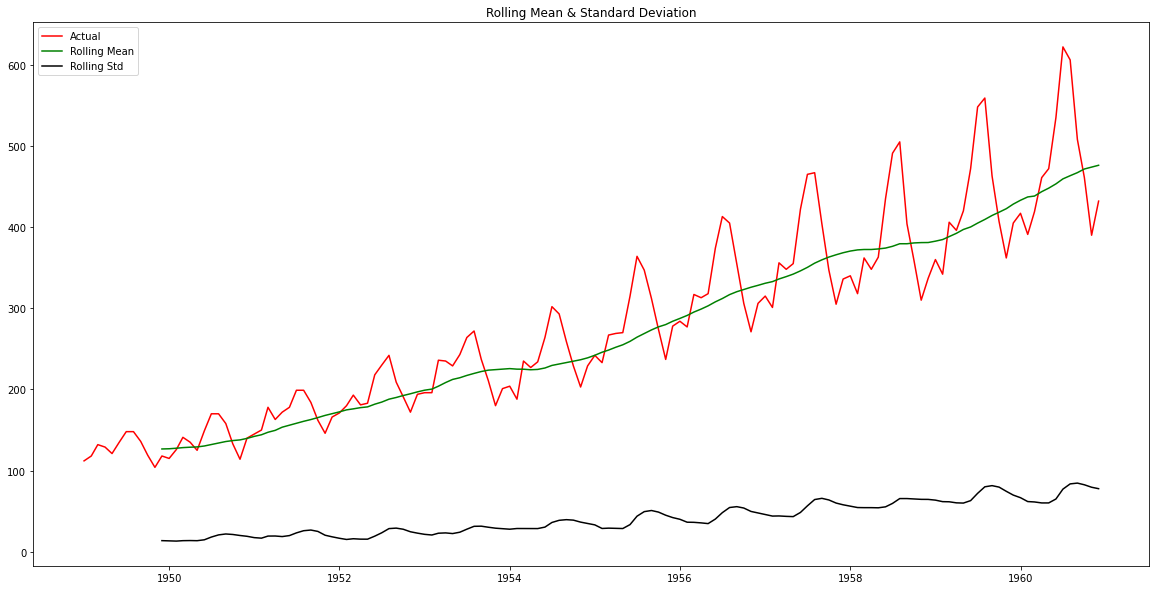

In [50]:
plt.figure(figsize=(20,10))
actual=plt.plot(data, color='red', label='Actual')
mean_6=plt.plot(rolmean, color='green', label='Rolling Mean') 
std_6=plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

- Using ADF (Augmented Dickey-Fuller Test) to check stationarity, another approach based on statistics.
- ADF has : 
<b>Null hypothesis         - Time Series is non-stationary</b>

In [51]:
from statsmodels.tsa.stattools import adfuller
print('Dickey-Fuller Test: ')
dftest=adfuller(data['Passengers'], autolag='AIC')
dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dftest)

Dickey-Fuller Test: 
(0.8153688792060433, 0.9918802434376409, 13, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 996.692930839019)


- From above ADF test, we fail to reject the null hypothesis, since p-value is greater than 0.05

- Below we took log transformation to make our Time series stationary and plotted visual for it
- We found graph upward trending over time with seasonality 

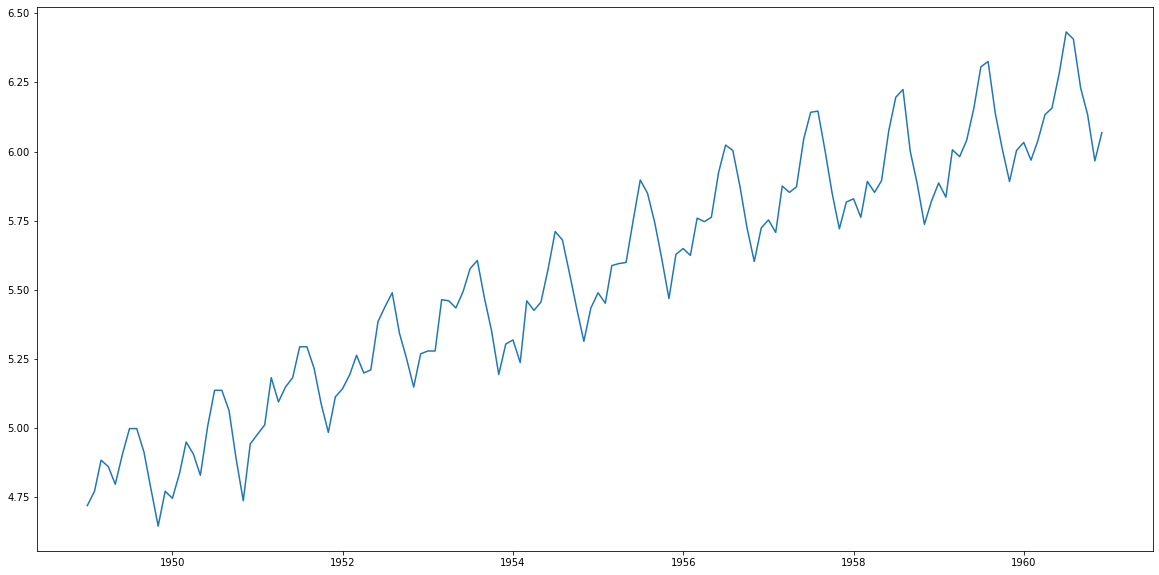

In [52]:
plt.figure(figsize=(20,10))
data_log=np.log(data)
plt.plot(data_log)

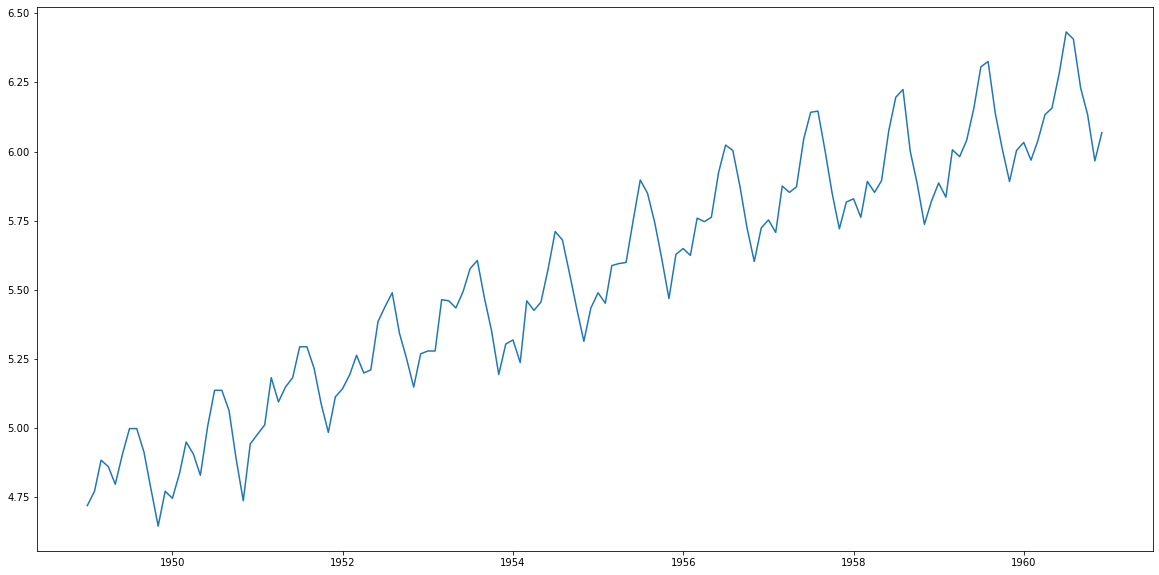

In [53]:
plt.figure(figsize=(20,10))
data_log=np.log(data)
plt.plot(data_log)

In [54]:
data_log.head()

,Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791


- Testing Rolling Mean with window 12 on above log transformation and concluded non-stationary, again

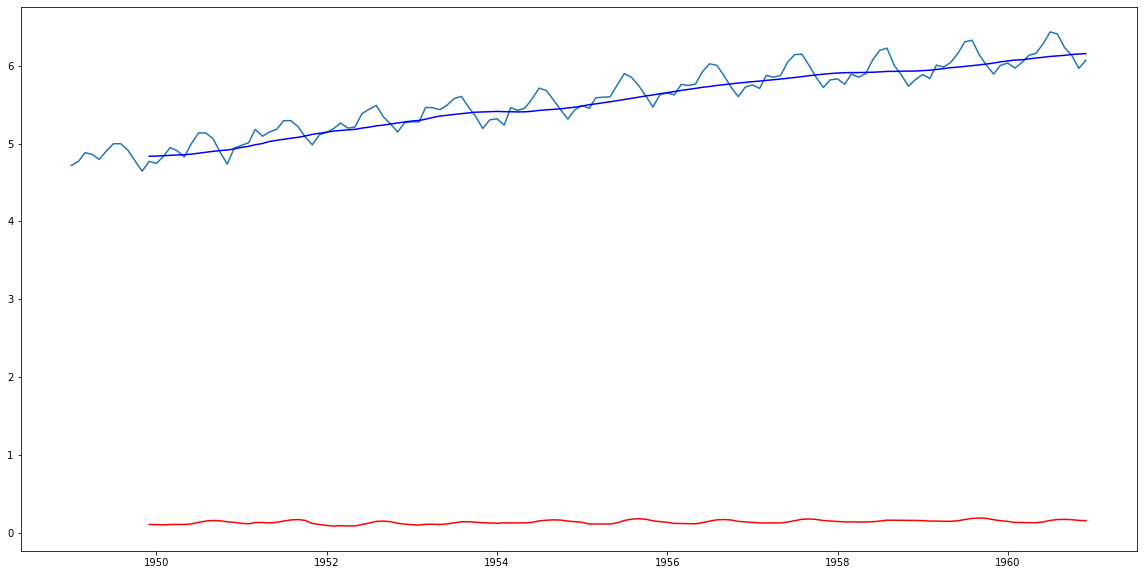

In [55]:
plt.figure(figsize=(20,10))
MAvg=data_log.rolling(window=12).mean()
MStd=data_log.rolling(window=12).std()
plt.plot(data_log)
plt.plot(MAvg, color='blue')
plt.plot(MStd,color='red')

- Using another method differencing, to make our time series stationary

In [56]:
data_log_diff=data_log-MAvg
data_log_diff.head(12)
data_log_diff.shape

(144, 1)

- Output of differencing method, after dropping null values

In [57]:
data_log_diff=data_log_diff.dropna()
data_log_diff.head()
data_log_diff.shape

(133, 1)

- Defining function for Rolling Mean and Standard Deviation & ADF test

In [58]:
def stationarity(timeseries):
    
    rolmean=timeseries.rolling(window=12).mean()
    rolstd=timeseries.rolling(window=12).std()
    
    plt.figure(figsize=(20,10))
    actual=plt.plot(timeseries, color='red', label='Actual')
    mean_6=plt.plot(rolmean, color='green', label='Rolling Mean') 
    std_6=plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    print('Dickey-Fuller Test: ')
    dftest=adfuller(timeseries['Passengers'], autolag='AIC')
    dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

- Checking the stationarity of differenced data
- From Rolling method, we see that Mean and standard deviation is not varying.
- From ADF, we reject the null hypothesis bcoz p-value is less than 0.05 (significance level)
- Applying all the transformation and methods, our differenced data is now stationary

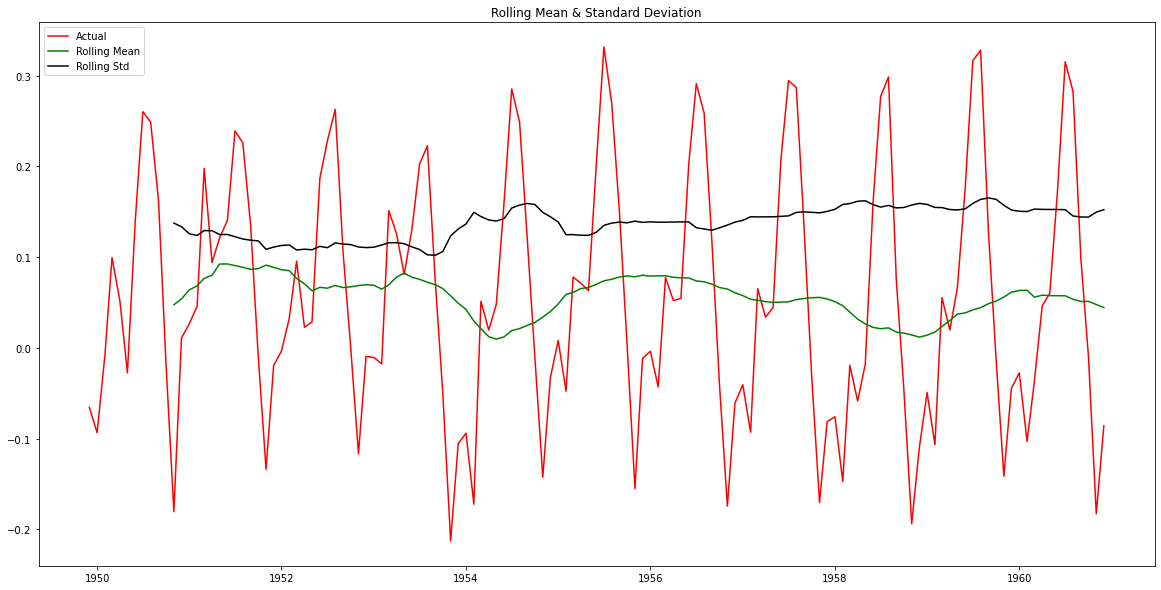

Dickey-Fuller Test: 
Test Statistic           -3.162908
p-value                   0.022235
Lags Used                13.000000
No. of Obs              119.000000
Critical Value (1%)      -3.486535
Critical Value (5%)      -2.886151
Critical Value (10%)     -2.579896
dtype: float64


In [59]:
stationarity(data_log_diff)

- Checking for Trend stationarity and performing exponential transformation on our data

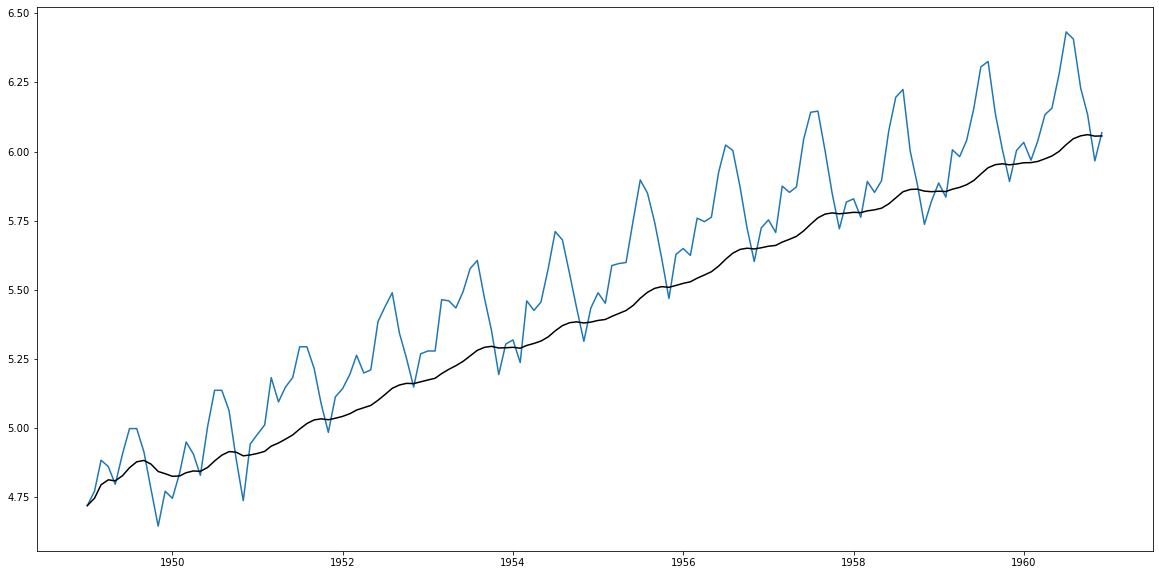

In [17]:
plt.figure(figsize=(20,10))
exp_data=data_log.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(data_log)
plt.plot(exp_data, color='black')

- Since log transformation is non-stationary, applying differencing on our data.

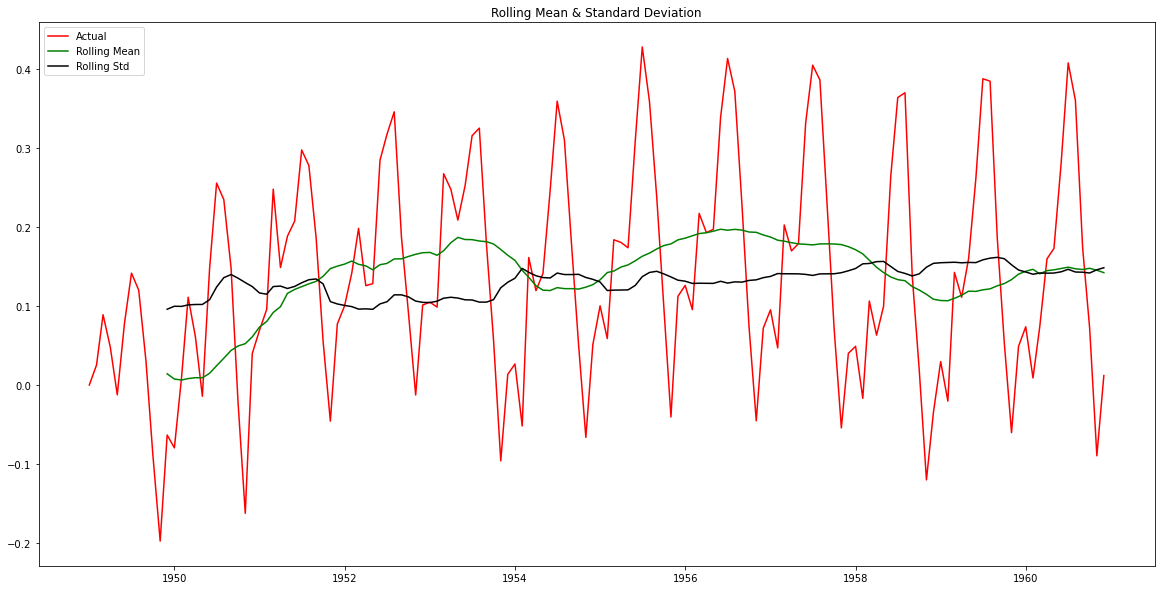

Dickey-Fuller Test: 
Test Statistic           -3.601262
p-value                   0.005737
Lags Used                13.000000
No. of Obs              130.000000
Critical Value (1%)      -3.481682
Critical Value (5%)      -2.884042
Critical Value (10%)     -2.578770
dtype: float64


In [18]:
exp_data_diff=data_log-exp_data
stationarity(exp_data_diff)

- From above graph and ADF test, we conclude, it is trend stationary

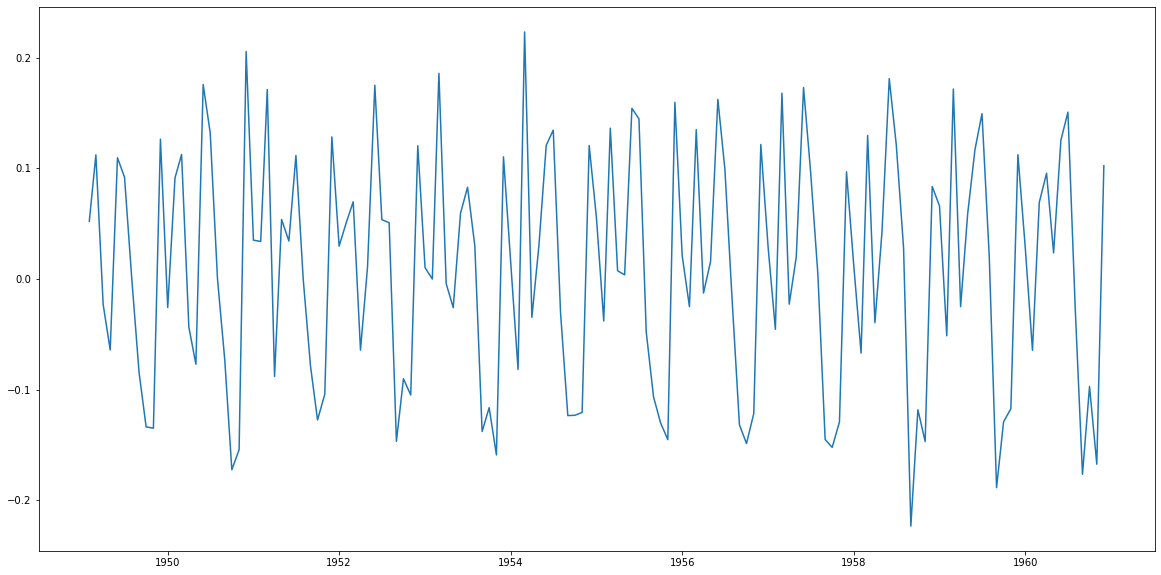

In [60]:
plt.figure(figsize=(20,10))
data_shift=data_log-data_log.shift()
plt.plot(data_shift)

In [62]:
df1=data_log.shift()
df1.head()

,Passengers
Month,
1949-01-01,NaN
1949-02-01,4.718499
1949-03-01,4.770685
1949-04-01,4.882802
1949-05-01,4.859812


In [67]:
data_log.head(2)

,Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685


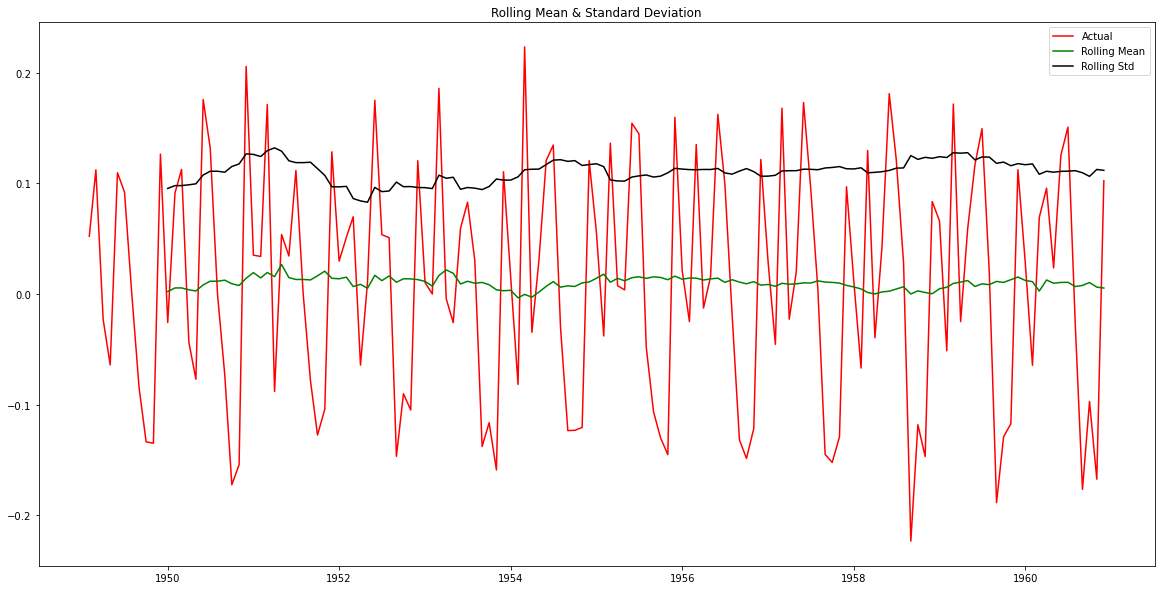

Dickey-Fuller Test: 
Test Statistic           -2.717131
p-value                   0.071121
Lags Used                14.000000
No. of Obs              128.000000
Critical Value (1%)      -3.482501
Critical Value (5%)      -2.884398
Critical Value (10%)     -2.578960
dtype: float64


In [69]:
data_shift=data_shift.dropna()
stationarity(data_shift)

- Decomposing Time Series into its components : Trend, Seasonality and Residual

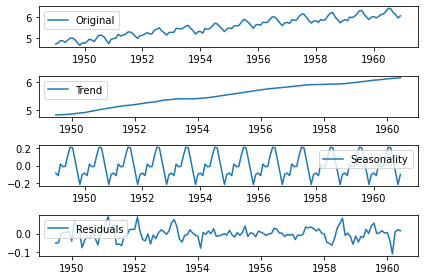

In [70]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp=seasonal_decompose(data_log)

trend=decomp.trend
seasonal=decomp.seasonal
residual=decomp.resid

plt.subplot(411)
plt.plot(data_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

- Checking the stationarity of Time Series components

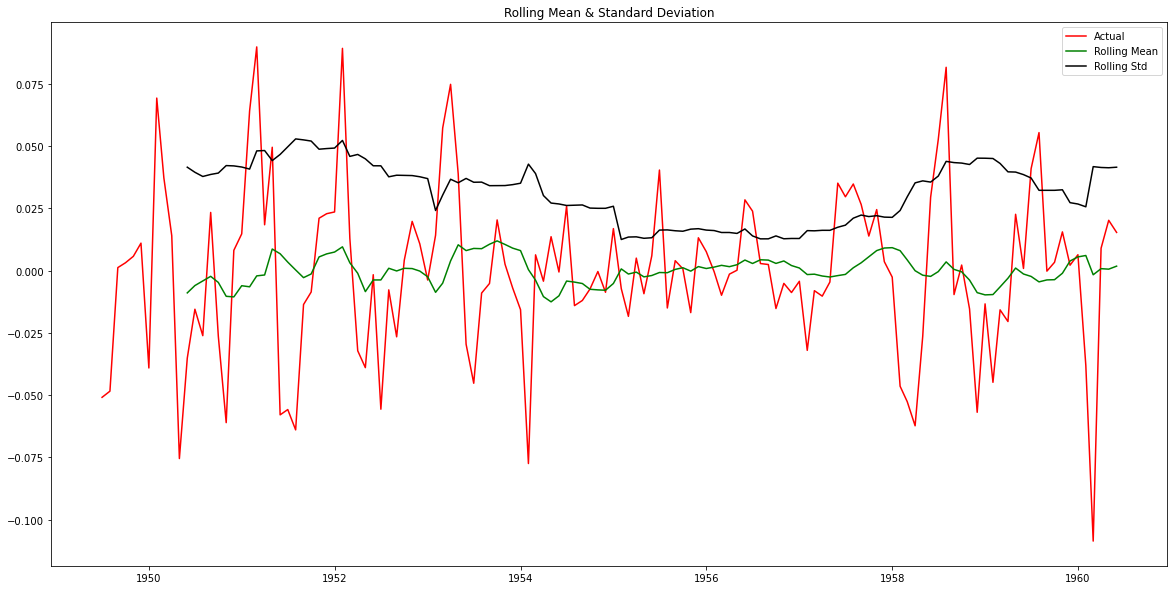

Dickey-Fuller Test: 


KeyError: 'Passengers'

In [72]:
decomp_data=residual
decomp_data=decomp_data.dropna()
stationarity(decomp_data)

- Plotting the ACF and PACF to find q and p value
- We got q and p both 2 from the graph

Text(0.5, 1.0, 'Partial Autocorrelation Function')

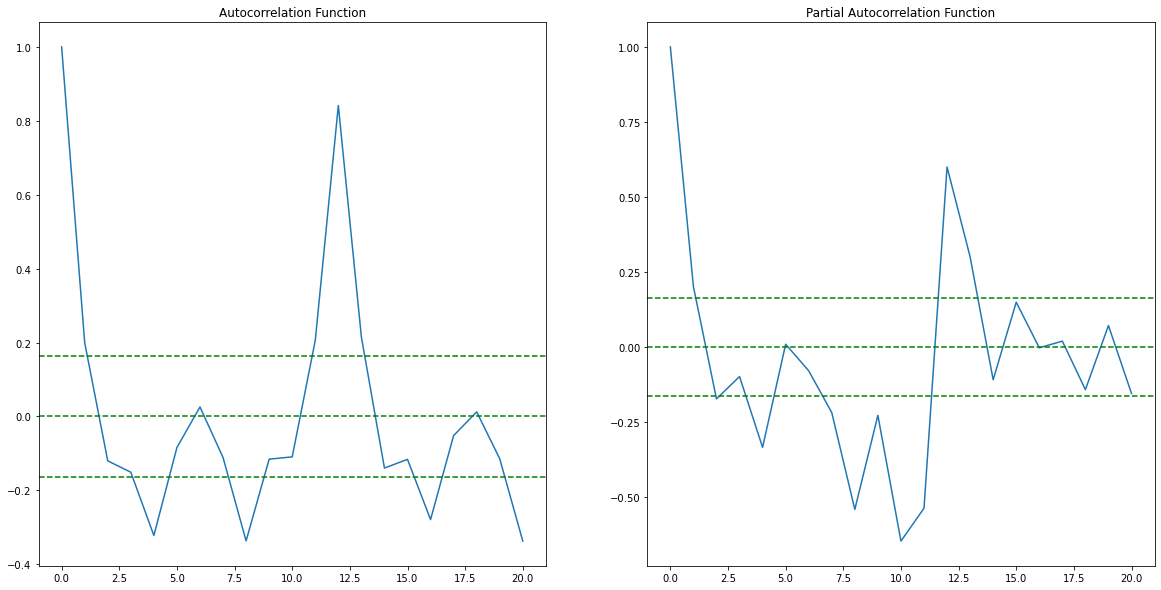

In [74]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf=acf(data_shift, nlags=20)
lag_pacf=pacf(data_shift, nlags=20, method='ols')

plt.figure(figsize=(20,10))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.title('Partial Autocorrelation Function')

- Building the ARIMA model with p=2, q=2 and I=1

plotting ARIMA model


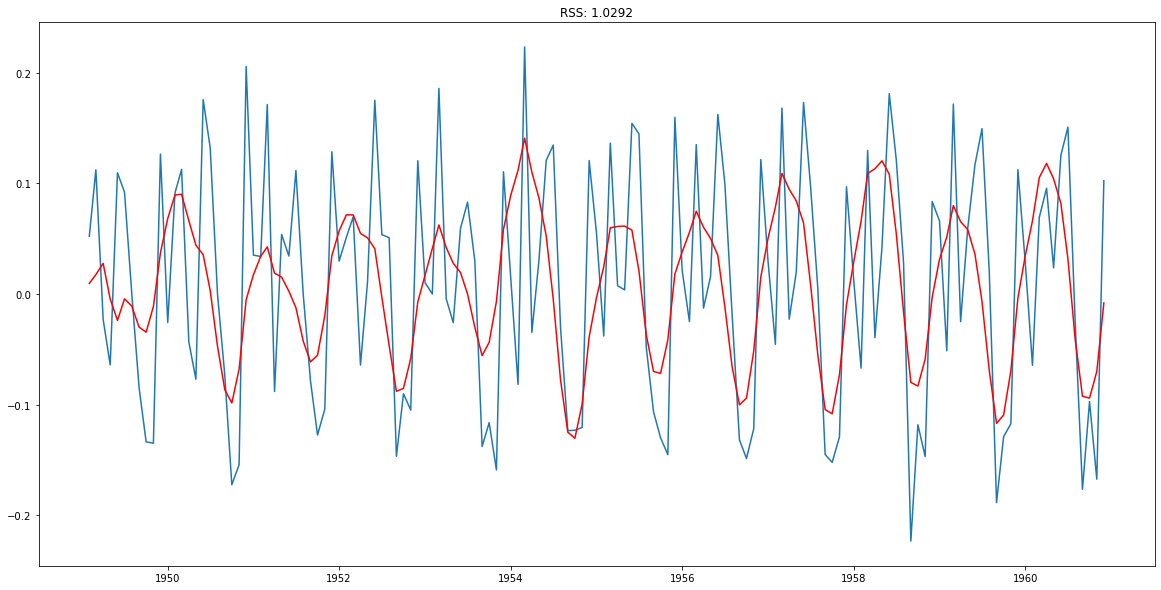

In [75]:
from statsmodels.tsa.arima_model import ARIMA

plt.figure(figsize=(20,10))
model=ARIMA(data_log, order=(2,1,2))
results=model.fit(disp=-1)
plt.plot(data_shift)
plt.plot(results.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results.fittedvalues-data_shift['Passengers'])**2))
print('plotting ARIMA model')

- Predicted values from ARIMA model in difference form

In [76]:
predictions=pd.Series(results.fittedvalues, copy=True)
print(predictions.head())

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64


- Performing Inverse Transformation for differencing, by doing cumulative sum

In [77]:
predictions_cum_sum=predictions.cumsum()
print(predictions_cum_sum.head())

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64


- Below is data display of predicted value in log scale

In [78]:
predictions_log=pd.Series(data_log['Passengers'].ix[0], index=data_log.index)
predictions_log=predictions_log.add(predictions_cum_sum,fill_value=0)
predictions_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

Taking out log transformation and visualizing actual vs predicted value graph

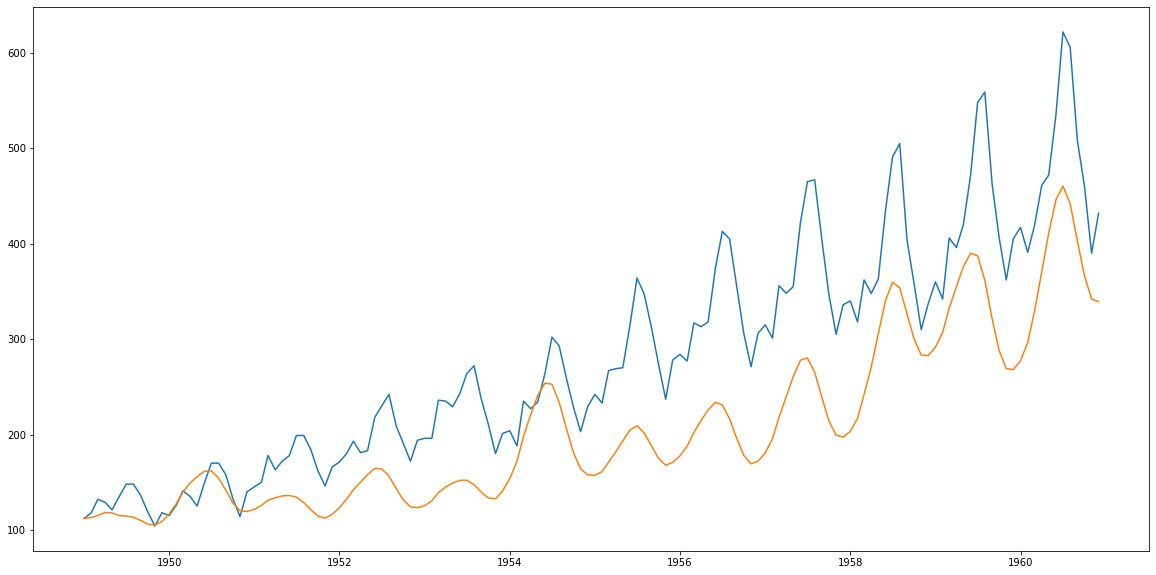

In [79]:
predictions_ARIMA=np.exp(predictions_log)
plt.figure(figsize=(20,10))
plt.plot(data)
plt.plot(predictions_ARIMA)

- Plotting the visual for forecast of next 10 years with 95% confidence interval

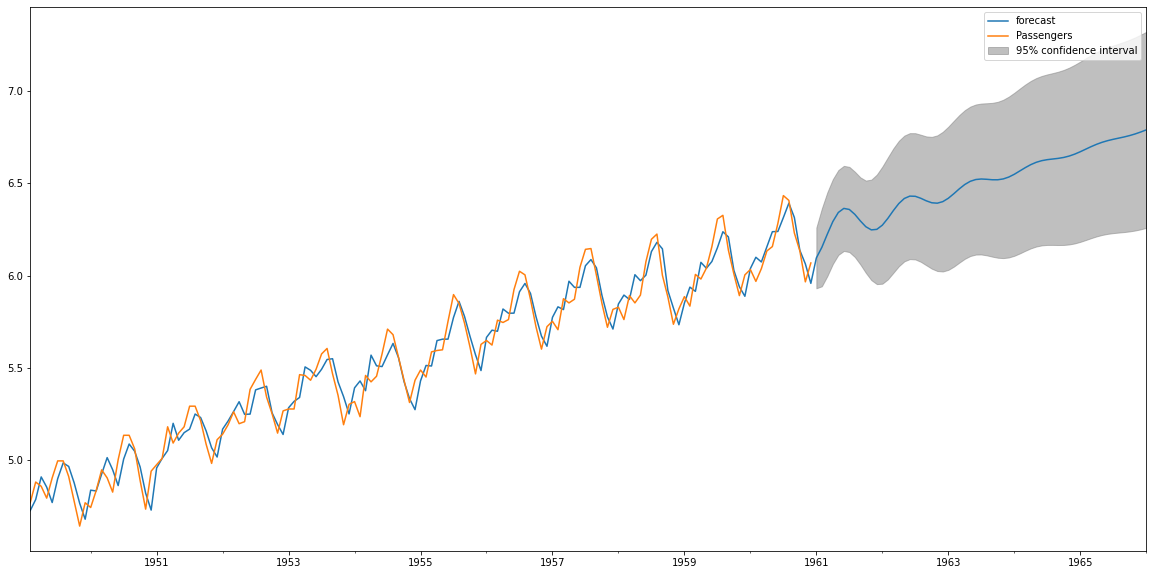

In [80]:
rcParams['figure.figsize']=20,10
results.plot_predict(1,204)
x=results.forecast(steps=120)

- Next 10 years predicted value on log scale

In [81]:
x[0]

array([6.09553392, 6.15281402, 6.22442963, 6.29241097, 6.3416471 ,
       6.36359354, 6.35784678, 6.33139297, 6.29597534, 6.26447708,
       6.2473832 , 6.25025166, 6.27275829, 6.30940304, 6.35151484,
       6.38988645, 6.4172737 , 6.43011043, 6.42906678, 6.41842478,
       6.40456144, 6.39403604, 6.39183071, 6.40019491, 6.41833679,
       6.44295394, 6.46937421, 6.49293972, 6.51024104, 6.51989018,
       6.52267563, 6.52112372, 6.51864511, 6.51853673, 6.52311906,
       6.53322343, 6.54812852, 6.5659154 , 6.58410291, 6.60036521,
       6.61313247, 6.62192762, 6.62737769, 6.63093108, 6.63438668,
       6.63937964, 6.64696483, 6.65739819, 6.67015303, 6.68414229,
       6.69806604, 6.71077878, 6.72157709, 6.7303396 , 6.73749786,
       6.74386354, 6.75037298, 6.75782567, 6.76668656, 6.77699797,
       6.78841293, 6.80032827, 6.81207168, 6.82308733, 6.83307108,
       6.84202464, 6.85022283, 6.85811192, 6.8661731 , 6.87479121,
       6.88416272, 6.89426353, 6.90487859, 6.91567907, 6.92632

- Actual predicted value for next 10 years, after taking out log transformation

In [82]:
np.exp(x[0])

array([ 443.87097554,  470.03822473,  504.93496135,  540.45477714,
        567.73064992,  580.32804632,  577.00260335,  561.93881189,
        542.38459614,  525.5666847 ,  516.65906161,  518.14320203,
        529.93708401,  549.71669007,  573.36059891,  595.7889227 ,
        612.33143809,  620.24243624,  619.59545978,  613.03668423,
        604.59658758,  598.26634151,  596.94841808,  601.96235308,
        612.98274726,  628.25990304,  645.07991856,  660.46208281,
        671.98837626,  678.50387124,  680.39644398,  679.34134276,
        677.65960639,  677.58616772,  680.69821353,  687.61110948,
        697.93677566,  710.46195219,  723.50170724,  735.3637049 ,
        744.81247468,  751.3920981 ,  755.49841793,  758.18777792,
        760.8123018 ,  764.62050268,  770.44235017,  778.52273259,
        788.51626149,  799.62453897,  810.83618339,  821.20993478,
        830.12566062,  837.4316089 ,  843.44767158,  848.83390911,
        854.37736503,  860.76856468,  868.42963406,  877.43069

<b>*************************End****************************</b>